In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Creating synthetic time series with pandas

## Component of time series

In [8]:
# Creating sintetic time series with pandas
# Time index array
t = np.arange(180) # Generates an array of 180 time stamps (0.5 year)
# Initialize DataFrame
df = pd.DataFrame(index=t)

# set the index as a datetime object with daily frequency starting on January 1, 2024
df.index = pd.to_datetime(df.index, unit='D', origin=pd.Timestamp('2024-01-01')) 

# Set the parameters for the time series components using the specified formulations
# Linear trend component
df['Trend'] = t * 0.1 # Linear trend component

# Seasonal component with a 30 days cycle and amplitude of 10
df['Seasonality'] = 10 * np.sin(2 * np.pi * t / 30) 

# Weekly ciclical component, not sinusoidal  with higher values on weekends
# find days friday and saturday and sunday
weekend = df.index.weekday.isin([4, 5, 6])
# Create a weekly cycle component random value 0-2 on week days and 4-8 on weekends
df['Weekly'] = np.where(weekend, np.random.uniform(4, 8, size=t.size), np.random.uniform(0, 2, size=t.size))

# Random noise component with normal distribution and standard deviation of 3
df['Noise'] = np.random.normal(0, 1, size=t.size) 



df.head()

,Trend,Seasonality,Weekly,Noise
2024-01-01,0.0,0.000000,1.194259,-0.343104
2024-01-02,0.1,2.079117,1.579361,-1.021445
2024-01-03,0.2,4.067366,0.484955,-0.030395
2024-01-04,0.3,5.877853,1.748470,-0.366184
2024-01-05,0.4,7.431448,6.332071,-0.945908


## Plot Components

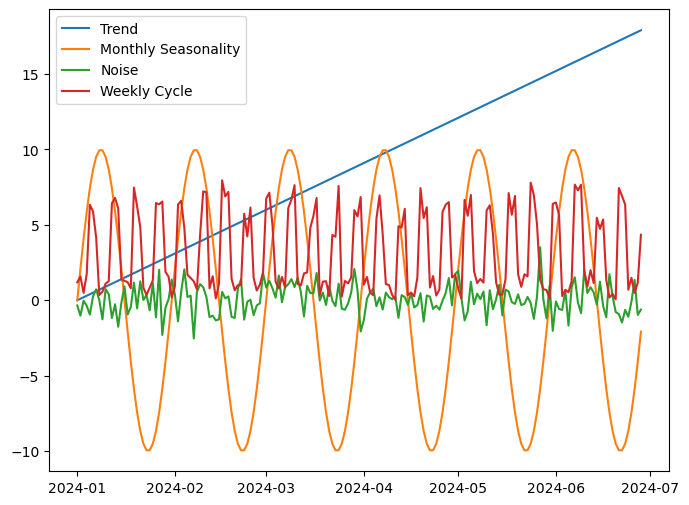

In [9]:
# Plot the time series components
plt.figure(figsize=(8, 6))
# Plot the trend component
plt.plot(df.index, df['Trend'], label='Trend')
# Plot the seasonal component
plt.plot(df.index, df['Seasonality'], label= 'Monthly Seasonality')
# Plot the noise component
plt.plot(df.index, df['Noise'], label='Noise')
# Plot the weekly component
plt.plot(df.index, df['Weekly'], label='Weekly Cycle')
plt.legend()
plt.show()


## Unified Time Series

In [10]:
# Create unified time series by adding all components
df['Time_Series'] = df['Trend'] + df['Seasonality'] + df['Weekly'] + df['Noise'] + 50 # Add 50 to make all values positive

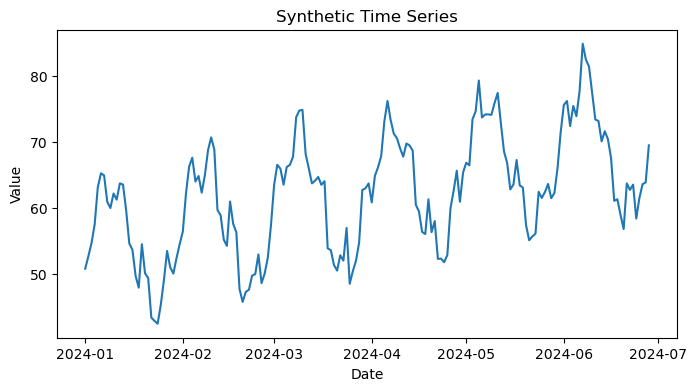

In [11]:
# Plot the unified time series  
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Time_Series'], label='Time Series')
plt.title('Synthetic Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

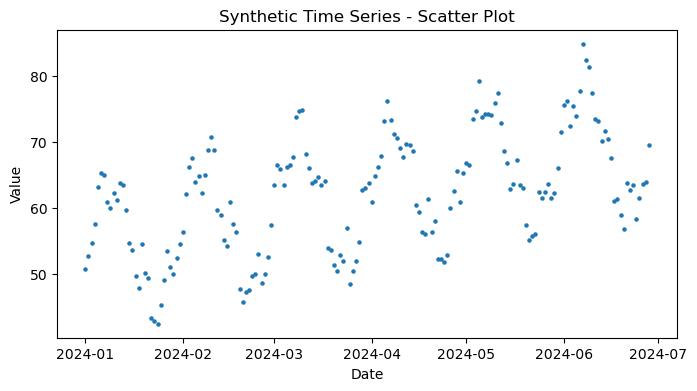

In [12]:
# Plot as scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(df.index, df['Time_Series'], label='Time Series', s=5) 
plt.title('Synthetic Time Series - Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



## Plotting Time Series with Interactive Visualization

In [13]:
import hvplot.pandas 
import hvplot as hv

In [16]:
df.plot(backend='hvplot', width=800, height=400, title='Synthetic Time Series', xlabel='Date', ylabel='Value', legend='top_left')

:NdOverlay   [Variable]
   :Curve   [index]   (value)

#  Handle missing values 

## Loading Time Series 

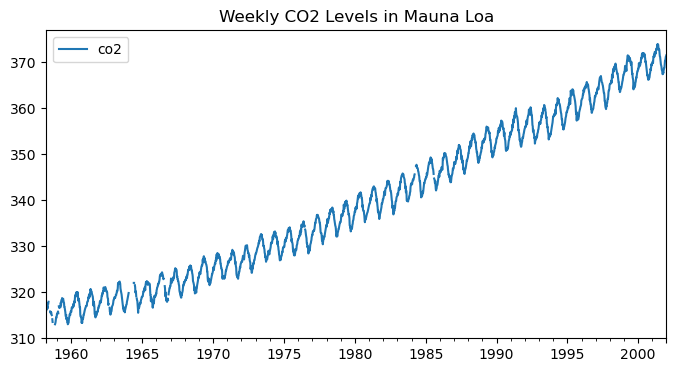

In [102]:
from statsmodels.datasets import co2 

# Load the dataset
co2_df = co2.load_pandas().data
# Plot the original data
co2_df.plot(title='Weekly CO2 Levels in Mauna Loa', figsize=(8, 4))
plt.show()


## Find Missing Values

In [103]:
# Find the missing values
missing_values = co2_df['co2'].isnull()
#print the number of missing_values dates per year
print('number of missing values per year:')
missing_values.resample('YE').sum() # Resample the missing values by year and sum the missing values, YE is the year end frequency

number of missing values per year:


1958-12-31    15
1959-12-31     4
1960-12-31     0
1961-12-31     0
1962-12-31     4
1963-12-31     3
1964-12-31    21
1965-12-31     0
1966-12-31     4
1967-12-31     2
1968-12-31     0
1969-12-31     0
1970-12-31     0
1971-12-31     0
1972-12-31     0
1973-12-31     0
1974-12-31     0
1975-12-31     0
1976-12-31     1
1977-12-31     0
1978-12-31     0
1979-12-31     0
1980-12-31     0
1981-12-31     0
1982-12-31     0
1983-12-31     0
1984-12-31     4
1985-12-31     1
1986-12-31     0
1987-12-31     0
1988-12-31     0
1989-12-31     0
1990-12-31     0
1991-12-31     0
1992-12-31     0
1993-12-31     0
1994-12-31     0
1995-12-31     0
1996-12-31     0
1997-12-31     0
1998-12-31     0
1999-12-31     0
2000-12-31     0
2001-12-31     0
Freq: YE-DEC, Name: co2, dtype: int64

### Focus on 1962 to 1967 period

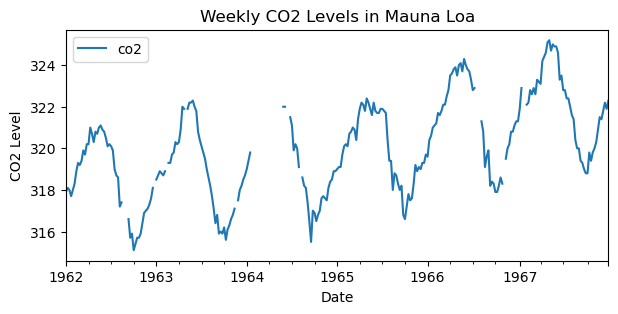

In [134]:
# Focus on 1962 to 1967 period
co2_62_67 = co2_df['1962-01-01':'1967-12-31']
# Plot the data
co2_62_67.plot(title='Weekly CO2 Levels in Mauna Loa', figsize=(7, 3))
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.show()

## Drop the missing values approach 

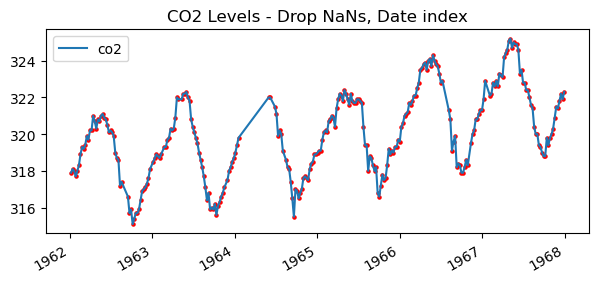

In [127]:
# Drop the missing values approach 
co2_62_67_dropna = co2_62_67.dropna()
# Plot the data with the date as x-axis
co2_62_67_dropna.plot(title='CO2 Levels - Drop NaNs, Date index', figsize=(7, 3))
# plot scatter on top of the line plot
plt.scatter(co2_62_67_dropna.index, co2_62_67_dropna['co2'], color='red', s=5)
plt.show()

### Present the "real" data set after drop NaNs

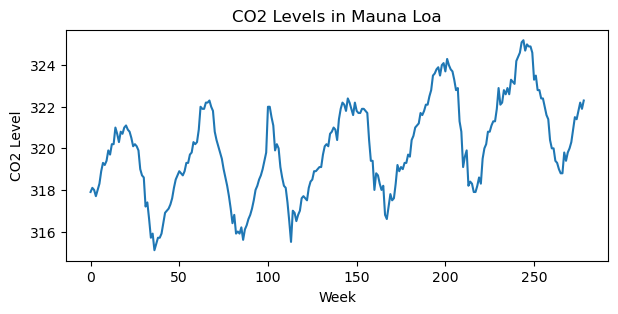

In [128]:
# Create a new df with running index as integer
co2_x_int= co2_62_67.reset_index()
# Drop the missing values in the co2_62_67_x
co2_x_dropna = co2_x_int.dropna()

# Reset the index
co2_x_dropna = co2_x_dropna.reset_index() 

# Plot the data without the missing dates with the running index as x-axis
plt.figure(figsize=(7, 3))
plt.plot(co2_x_dropna.index, co2_x_dropna['co2'])
plt.title('CO2 Levels in Mauna Loa')
plt.xlabel('Week')
plt.ylabel('CO2 Level')
plt.show()

## Forward and Backward feed approach

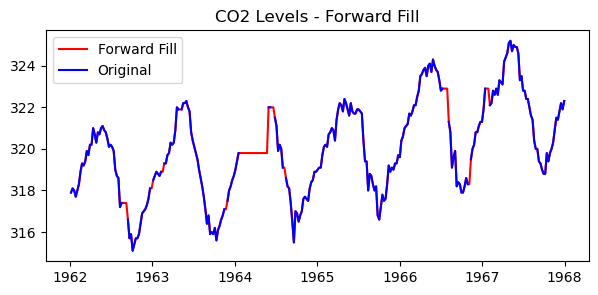

In [125]:
# Forward feed approach
co2_62_67_ffill = co2_62_67.fillna(method='ffill') # Forward fill the missing values
# Plot the data with forward fill
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_ffill.index, co2_62_67_ffill['co2'], color='red', label='Forward Fill')
plt.plot(co2_62_67['co2'], color='blue', label='Original')
plt.title('CO2 Levels - Forward Fill')
plt.legend()
plt.show()

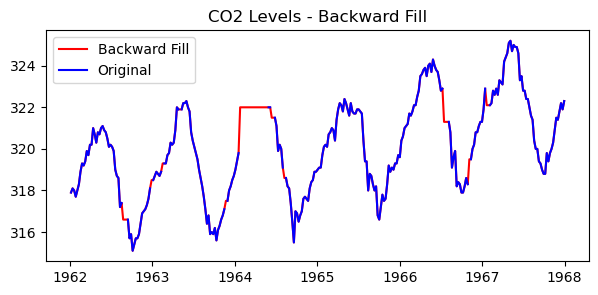

In [126]:
# Backward feed approach
co2_62_67_bfill = co2_62_67.fillna(method='bfill') # Backward fill the missing values
# Plot the data with backward fill
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_bfill.index, co2_62_67_bfill['co2'], color='red', label='Backward Fill') 
plt.plot(co2_62_67['co2'], color='blue', label='Original')
plt.title('CO2 Levels - Backward Fill')
plt.legend()
plt.show()

## Interpolation Approach

### Linear interpolation 

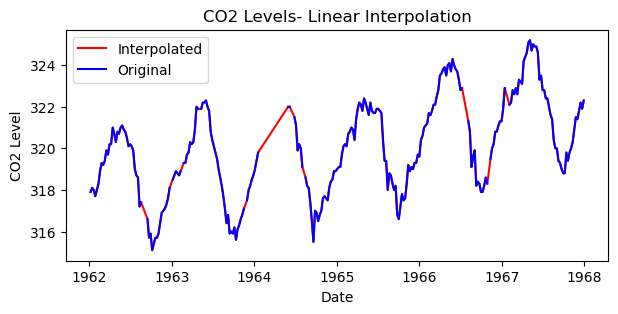

In [133]:
# Linear interpolation 
co2_62_67_interp = co2_62_67.interpolate(method='linear') # Linear interpolation
# Plot the data with interpolation
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_interp.index, co2_62_67_interp['co2'], label='Interpolated', color='red')
plt.plot(co2_62_67.index, co2_62_67['co2'], label='Original', color='blue')
plt.title('CO2 Levels- Linear Interpolation')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()

### Spline interpolation 

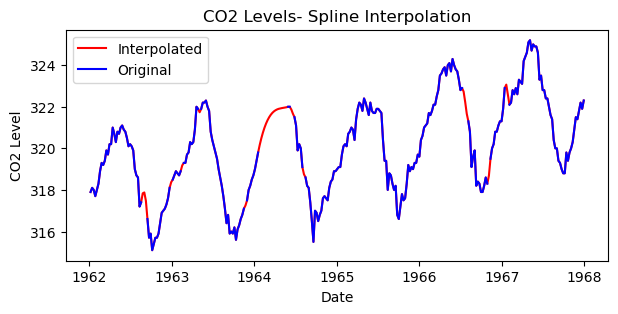

In [136]:
# interpolation 
co2_62_67_spline = co2_62_67.interpolate(method='polynomial', order=3) # Interpolate the missing values
# Plot the data with interpolation
plt.figure(figsize=(7, 3))
plt.plot(co2_62_67_spline.index, co2_62_67_spline['co2'], label='Interpolated', color='red')
plt.plot(co2_62_67.index, co2_62_67['co2'], label='Original', color='blue')
plt.title('CO2 Levels- Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('CO2 Level')
plt.legend()
plt.show()